In [ ]:
pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 38kB/s 
     |████████████████████████████████| 3.8MB 41.7MB/s 
     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 512kB 38.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=fbbdd835cc4a7349d9017fbdbd68b23d0f958382cf8990b2caf096e68dc31b02
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tens

In [ ]:
pip install keras==2.3.1

     |████████████████████████████████| 378kB 5.5MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
#Importing Libraries and checking the version of tensorflow and keras

import keras
import tensorflow as tf
print(tf.__version__)
print(keras.__version__)

Using TensorFlow backend.


1.15.0
2.3.1


# **Importing Libraries!**

In [ ]:
#Importing basic Libraries

import random as rn # Generates pseudo random numbers
import numpy as np  # It can be utilised to perform a number of mathematical operations on arrays such as 
                    # trigonometric, statistical, and algebraic routines. Therefore, 
                    # the library contains a large number of mathematical, algebraic, and transformation functions.
import pandas as pd # It is a Python package that offers various data structures and operations for manipulating numerical data and time series. 
import os           # The OS module in python provides functions for interacting with the operating system.
import glob         # The glob module is used to retrieve files/pathnames matching a specified pattern.
import datetime     # Work with dates and times

# **Loading the Data!**



In [ ]:
#To upload from your local drive, start with the following code:(Wait till 100% done)

from google.colab import files
uploaded=files.upload()

Saving S & P 500.csv to S & P 500.csv


In [ ]:
#Type in the following code to import it into a dataframe (make sure the filename matches the name of the uploaded file).

import io  # for dealing with various types of I/O
df = pd.read_csv(io.BytesIO(uploaded['S & P 500.csv']))

In [ ]:
df.drop(['Unnamed: 0'],inplace=True,axis=1) #Removing unnecessary columns

#Reformatting and Sorting by date

df['date'] = pd.to_datetime(df['date']) #Always format the date
df = df.sort_values(['date'])

# **Cleaning the Data!**

It is important to drop weekends as the Indian Stock Market does not normally trade on weekends.

In [ ]:
#Removing Weekends

df = df[(df['date'].dt.dayofweek != 5)&(df['date'].dt.dayofweek != 6)]

**Now, First : Dealing with missing values, all the columns with more that 10% of missing values are dropped.**

In [ ]:
#Dropping if % of missing values is greater than 10%

df = df.loc[:, df.isna().sum()/df.shape[0] <= 0.1]
df = df.dropna(axis=0,how='all',subset=df.columns[1:])
df

,date,Bombay Stock Exchange: Index: 100,Bombay Stock Exchange: Index: SENSEX,Bombay Stock Exchange: Index: 200,Bombay Stock Exchange: Index: Dollex-200,Bombay Stock Exchange: Index: 500,Bombay Stock Exchange: Index: Information Technology,Bombay Stock Exchange: Index: Capital Goods,Bombay Stock Exchange: Index: Fast Moving Consumer Goods,Bombay Stock Exchange: Index: Consumer Durables,Bombay Stock Exchange: Index: Health Care,Bombay Stock Exchange: Index: Auto,Bombay Stock Exchange: Index: Metal,Bombay Stock Exchange: Index: Oil & Gas,Bombay Stock Exchange: PE Ratio: Index: SENSEX,Bombay Stock Exchange: PE Ratio: Index: 100,Bombay Stock Exchange: PE Ratio: Index: 200,Bombay Stock Exchange: PB Ratio: Index: SENSEX,Bombay Stock Exchange: PB Ratio: Index: 100,Bombay Stock Exchange: PB Ratio: Index: 200,Bombay Stock Exchange: Dividend Yield: Index: SENSEX,Bombay Stock Exchange: Dividend Yield: Index: 100,Bombay Stock Exchange: Dividend Yield: Index: 200,Bombay Stock Exchange: Scrips: Trade: Total,Bombay Stock Exchange: Scrips: Trade: Advance,Bombay Stock Exchange: Scrips: Trade: Decline,Bombay Stock Exchange: Scrips: Trade: Unchanged,Bombay Market Commodity Price: Gold: Standard,Bombay Market Commodity Price: Silver: .999,RBI: Companies: Commercial Paper: Effective Discount Rate: Low,RBI: Companies: Commercial Paper: Effective Discount Rate: High,Deposit Rate: RBI: 5 Major Banks: Maturity > 1 Year: Low,Deposit Rate: RBI: 5 Major Banks: Maturity > 1 Year: High,Foreign Exchange Rates: RBI: Interbank Forward Premia of USD: 1 Mth,Foreign Exchange Rates: RBI: Interbank Forward Premia of USD: 3 Mths,RBI: Bank Rate,Lending Rate: SBI: Benchmark Prime Lending Rate (BPLR),SCB: Certificates of Deposits: Effective Interest Rate: Low,SCB: Certificates of Deposits: Effective Interest Rate: High,Wholesale Debt Market: NSE: Securities: Trade: Number,Wholesale Debt Market: NSE: Securities: Trade: Value,Foreign Exchange Rate: RBI: Reference Rate: US Dollar,Foreign Exchange Rate: RBI: Reference Rate: Pound Sterling,Foreign Exchange Rate: RBI: Reference Rate: Euro,Foreign Exchange Rate: RBI: Reference Rate: Japanese Yen,RBI: Cash Reserve Ratio,National Stock Exchange: Index: Nifty 50,National Stock Exchange: Index: Nifty Next 50,National Stock Exchange: Index: Nifty IT,National Stock Exchange: Index: Nifty Bank,National Stock Exchange: Index: Nifty50 USD,National Stock Exchange: Index: Nifty 500,National Stock Exchange: PE Ratio: Nifty 50,National Stock Exchange: PB Ratio: Nifty 50,National Stock Exchange: Dividend Yield: Nifty 50,National Stock Exchange: Turnover: Value,National Stock Exchange: Turnover: Volume,National Stock Exchange: Turnover: Trade: Advance,National Stock Exchange: Turnover: Trade: Decline,National Stock Exchange: Trade,National Stock Exchange: Market Capitalization: Total
2,2000-01-03,1636.49,5375.11,635.04,243.17,1920.08,4260.20,1196.46,1172.50,1526.33,2246.26,1384.78,1865.10,1487.62,23.27,31.29,29.61,3.84,3.55,3.01,1.05,0.87,1.00,2740.0,2055.0,544.0,141.0,4550.0,8280.0,9.05,11.65,8.0,10.5,2.76,3.31,8.0,12.0,8.5,11.0,292.0,18787.0,43.4800,70.457268,44.206711,42.667213,9.0,1592.20,4288.60,4501.59,1054.81,1268.40,1291.55,25.91,4.63,0.95,17533.5,76.083,1020.0,142.0,267038.0,9121240.0
3,2000-01-04,1690.67,5491.01,652.91,249.89,1972.29,4554.08,1179.47,1138.74,1517.65,2285.99,1398.91,1854.09,1481.58,23.77,32.35,30.46,3.93,3.67,3.09,1.03,0.84,0.98,2768.0,1049.0,1568.0,151.0,4530.0,8225.0,9.05,11.65,8.0,10.5,2.76,3.31,8.0,12.0,8.5,11.0,200.0,12845.0,43.5000,71.098471,44.557323,42.501286,9.0,1638.70,4488.20,4822.15,1092.08,1305.30,1335.45,26.67,4.76,0.92,42680.2,106.734,464.0,747.0,445618.0,9369010.0
4,2000-01-05,1643.14,5357.00,636.89,243.65,1922.87,4342.29,1145.40,1116.22,1470.10,2194.35,1392.58,1899.13,1494.55,23.19,31.44,29.72,3.83,3.57,3.02,1.05,0.87,1.00,2730.0,691.0,1867.0,172.0,4490.0,8220.0,9.05,11.65,8.0,10.5,3.03,3.40,8.0,12.0,8.5,11.0,202.0,12447.6,43.5200,71.275837,44.901441,42.272931,9.0,1595.80,4291.65,4643.08,1055.99,130

**Second: For the remaining columns with at most 10% missing observation, the missing values are fillied using linear interpolation.**

In [ ]:
# Linear Interpolation to deal with missing data!
# Interpolation is a statistical method by which 
# related known values are used to estimate an unknown price or potential yield of a security.

# Extrapolation is the act or process of estimating the value of a variable or function outside the tabulated or observed range.

date = df['date']
df = df[df.columns[1:]].astype(float).interpolate(method ='linear',axis = 0,limit=30,
                                                              limit_direction ='forward')

#Sort by date

df['date'] = date
df = df.sort_values(['date'])

# **Making the Data Stationary!**

**What is stationarity?**

Stationarity is a property of time series data stating that the distributional properties (Mean and Standard Deviation) of the data series has not changed across time.

**Why is it important to have stationarity data?**

For forecasting it is important that the data be stationary because in the absence of stationarity, one is asking the model to predict data that is nothing like anything it has seen before.

**How do you test for stationarity?**

A common test of stationarity is the Dickey-Fuller Test.

If the p-value associated with the Dickey-Fuller Test statistic is greater than 0.05, we state that the data is not stationary.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


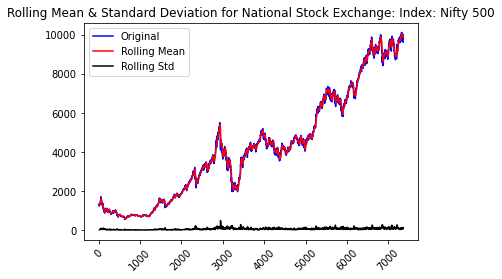

Results of Dickey-Fuller Test:
Test Statistic                    0.078353
p-value                           0.964552
# Lags Used                      13.000000
Number of Observations Used    5244.000000
Critical Value (1%)              -3.431598
Critical Value (5%)              -2.862091
Critical Value (10%)             -2.567063
dtype: float64


In [ ]:
# Defining a function to test Stationarity!

#SOURCE:https://github.com/tklouie/PyData_LA_2018/blob/master/PyData_LA_2018_Tutorial.ipynb

import matplotlib.pyplot as plt
import statsmodels.tsa.stattools # Statsmodels is a Python package that allows users to explore data, estimate statistical models, and perform statistical tests.
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.x13
from statsmodels.tsa.x13 import x13_arima_select_order, _find_x12
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.graphics.tsaplots as tsaplots

def test_stationarity(df, ts):

    # Determing rolling statistics
    # Rolling Statistics (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends. 
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()

    # Plot rolling statistics:
    orig = plt.plot(df[ts], color = 'blue',label = 'Original')
    mean = plt.plot(rolmean, color = 'red',label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()

    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print ('Results of Dickey-Fuller Test:')
    dftest = statsmodels.tsa.stattools.adfuller(df[ts], autolag='AIC') #add kpss
    
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value', '# Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
#Applying the function to our Y variable: National Stock Exchange: Index: Nifty 500

test_stationarity(df, 'National Stock Exchange: Index: Nifty 500')

From the above results, we see that the **p-value is 0.964552**, leading to the conclusion that the Nifty500 Index series is not stationary.

It can be futher seen more clearly from the graph - the clear upward trend of the rolling mean and rolling standard deviation signals that Nifty500 is not stationary.

So what should one do when the data is not stationary? 
Make the data as stationary as possible.

The easiest way of making the data stationary is to calculate the first difference:

For level variables (like indices), the first difference in the percentage change vis-a-vis the previous time period.

For percentage variables, its the value of the variable in the current time period subtracted from the value of the variables at the previous date.

In [ ]:
#Defining a function to calculate Percentage Change!

def percentChange(x,numLags):
    
    '''
    INPUTS:
    x: Column for which we want to calculate percent change
    numLags: The number of days from when the change needs to be calculated. 
            Example : If using daily data - numLags = 1 for daily change
                                            numLags = 30 for monthly change
                                            numLags = 365 for yearly change       
    OUTPUT:
    percentage change in variable
    '''
    y = (x - x.shift(numLags))/x.shift(numLags)
    return y

dataForMl = pd.DataFrame()
dataForMl['date'] = df['date']

#Here, I only have level variables so I do not need to separate my variables into level vs non-level variables.

levelVars = df.columns[:-1]
for levelVar in levelVars:
    dataForMl[f'{levelVar}Ret'] = percentChange(df[levelVar],1)
    
dataForMl = dataForMl[1:] #Ignoring the first row as it contains null values

**Having calculated the percentage change for all our variables, let's check if our data is stationary now...**

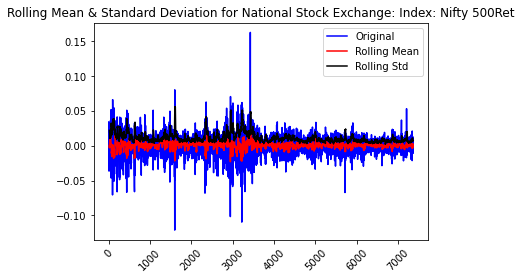

Results of Dickey-Fuller Test:
Test Statistic                -1.741829e+01
p-value                        4.842084e-30
# Lags Used                    1.300000e+01
Number of Observations Used    5.243000e+03
Critical Value (1%)           -3.431598e+00
Critical Value (5%)           -2.862091e+00
Critical Value (10%)          -2.567064e+00
dtype: float64


In [ ]:
test_stationarity(dataForMl, 'National Stock Exchange: Index: Nifty 500Ret')

From the above graphs, we see that the percentage change in Nifty 500 Index
(i.e. National Stock Exchange: Index: Nifty 500Ret) is stationary as the p-value is less that 0.05.

Again, for greater intuition look at the graph - the rolling mean and rolling standard deviation lines are along are almost flat meaning that they don't change in a statistically significant manner over time.

However, do note that taking the first difference does not necessarily have to make the data stationary.

# **Lagging the Data!**

Next, because sequential/time series data is auto regressive in nature 
- i.e. the outcome today depends on the outcome yesterday and the outcome the day before yesterday and so on - we need to create lagged versions of each independent variable.

**So how many lags of the independent variables do we want to include?**

The maximum number of lags of the dependent variable to use can be decided from the **Autocorrelation Function (ACF) and/or Partial Autocorrelation Function (PACF)** plot or decided heuristically based on domain specific cycles (ex:a business cycle,seasons etc).

**Autocorrelation function (ACF)-**
At lag k, this is the correlation between series values that are k intervals apart.

**Partial autocorrelation function (PACF)-** 
At lag k, this is the correlation between series values that are k intervals apart, accounting for the values of the intervals between.

The maximum number of lags of other independent variables to include is rather arbitrary - can be decided heuristically based on domain specific cycles (ex:a business cycle,seasons etc).

The minimum number of lags to include depending on the forcasting horizon. If you want to forecast h steps ahead, you exclude the first h lags.

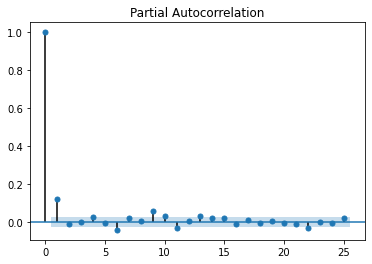

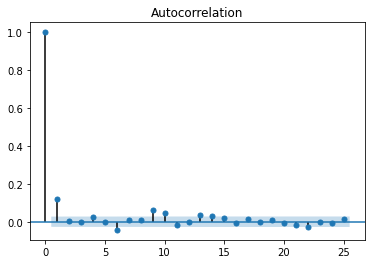

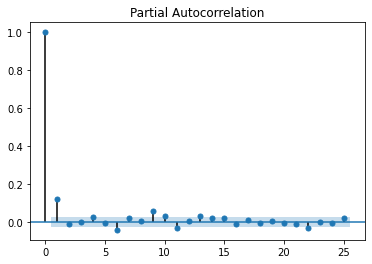

In [ ]:
# We can make the acf and pacf plots using the statsmodels library in Python!

from statsmodels.tsa.stattools import acf, pacf
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.graphics.tsaplots import plot_acf

tsaplots.plot_acf(dataForMl['National Stock Exchange: Index: Nifty 500Ret'].astype(float),lags =25)
tsaplots.plot_pacf(dataForMl['National Stock Exchange: Index: Nifty 500Ret'].astype(float),lags =25)

**Both the ACF and PACF plots show high serial correlation at the first lag.**

In [ ]:
# Since we're going to forecast the one day ahead Nifty stock returns, the minimum lag considered by me is 1

minLagNum = 1

# Lagging the vars: Here I'm ignoring the ACF and PACF lag structure and deciding the maximum number of lags heuristically.

maxLagNum = 10 # Here I have chosen the maxLagNum arbitrarily. A better strategy is to look at the acf plot.

dataForMl = dataForMl.sort_values(['date'])
for column in dataForMl.columns:
    for lag in range(minLagNum,maxLagNum+1):
        dataForMl[f'{column}Lag_{lag}'] = dataForMl[f'{column}'].shift(lag)
        

dataForMl.head(5)

,date,Bombay Stock Exchange: Index: 100Ret,Bombay Stock Exchange: Index: SENSEXRet,Bombay Stock Exchange: Index: 200Ret,Bombay Stock Exchange: Index: Dollex-200Ret,Bombay Stock Exchange: Index: 500Ret,Bombay Stock Exchange: Index: Information TechnologyRet,Bombay Stock Exchange: Index: Capital GoodsRet,Bombay Stock Exchange: Index: Fast Moving Consumer GoodsRet,Bombay Stock Exchange: Index: Consumer DurablesRet,Bombay Stock Exchange: Index: Health CareRet,Bombay Stock Exchange: Index: AutoRet,Bombay Stock Exchange: Index: MetalRet,Bombay Stock Exchange: Index: Oil & GasRet,Bombay Stock Exchange: PE Ratio: Index: SENSEXRet,Bombay Stock Exchange: PE Ratio: Index: 100Ret,Bombay Stock Exchange: PE Ratio: Index: 200Ret,Bombay Stock Exchange: PB Ratio: Index: SENSEXRet,Bombay Stock Exchange: PB Ratio: Index: 100Ret,Bombay Stock Exchange: PB Ratio: Index: 200Ret,Bombay Stock Exchange: Dividend Yield: Index: SENSEXRet,Bombay Stock Exchange: Dividend Yield: Index: 100Ret,Bombay Stock Exchange: Dividend Yield: Index: 200Ret,Bombay Stock Exchange: Scrips: Trade: TotalRet,Bombay Stock Exchange: Scrips: Trade: AdvanceRet,Bombay Stock Exchange: Scrips: Trade: DeclineRet,Bombay Stock Exchange: Scrips: Trade: UnchangedRet,Bombay Market Commodity Price: Gold: StandardRet,Bombay Market Commodity Price: Silver: .999Ret,RBI: Companies: Commercial Paper: Effective Discount Rate: LowRet,RBI: Companies: Commercial Paper: Effective Discount Rate: HighRet,Deposit Rate: RBI: 5 Major Banks: Maturity > 1 Year: LowRet,Deposit Rate: RBI: 5 Major Banks: Maturity > 1 Year: HighRet,Foreign Exchange Rates: RBI: Interbank Forward Premia of USD: 1 MthRet,Foreign Exchange Rates: RBI: Interbank Forward Premia of USD: 3 MthsRet,RBI: Bank RateRet,Lending Rate: SBI: Benchmark Prime Lending Rate (BPLR)Ret,SCB: Certificates of Deposits: Effective Interest Rate: LowRet,SCB: Certificates of Deposits: Effective Interest Rate: HighRet,Wholesale Debt Market: NSE: Securities: Trade: NumberRet,...,National Stock Exchange: Turnover: Trade: AdvanceRetLag_1,National Stock Exchange: Turnover: Trade: AdvanceRetLag_2,National Stock Exchange: Turnover: Trade: AdvanceRetLag_3,National Stock Exchange: Turnover: Trade: AdvanceRetLag_4,National Stock Exchange: Turnover: Trade: AdvanceRetLag_5,National Stock Exchange: Turnover: Trade: AdvanceRetLag_6,National Stock Exchange: Turnover: Trade: AdvanceRetLag_7,National Stock Exchange: Turnover: Trade: AdvanceRetLag_8,National Stock Exchange: Turnover: Trade: AdvanceRetLag_9,National Stock Exchange: Turnover: Trade: AdvanceRetLag_10,National Stock Exchange: Turnover: Trade: DeclineRetLag_1,National Stock Exchange: Turnover: Trade: DeclineRetLag_2,National Stock Exchange: Turnover: Trade: DeclineRetLag_3,National Stock Exchange: Turnover: Trade: DeclineRetLag_4,National Stock Exchange: Turnover: Trade: DeclineRetLag_5,National Stock Exchange: Turnover: Trade: DeclineRetLag_6,National Stock Exchange: Turnover: Trade: DeclineRetLag_7,National Stock Exchange: Turnover: Trade: DeclineRetLag_8,National Stock Exchange: Turnover: Trade: DeclineRetLag_9,National Stock Exchange: Turnover: Trade: DeclineRetLag_10,National Stock Exchange: TradeRetLag_1,National Stock Exchange: TradeRetLag_2,National Stock Exchange: TradeRetLag_3,National Stock Exchange: TradeRetLag_4,National Stock Exchange: TradeRetLag_5,National Stock Exchange: TradeRetLag_6,National Stock Exchange: TradeRetLag_7,National Stock Exchange: TradeRetLag_8,National Stock Exchange: TradeRetLag_9,National Stock Exchange: TradeRetLag_10,National Stock Exchange: Market Capitalization: TotalRetLag_1,National Stock Exchange: Market Capitalization: TotalRetLag_2,National Stock Exchange: Market Capitalization: TotalRetLag_3,National Stock Exchange: Market Capitalization: TotalRetLag_4,National Stock Exchange: Market Capitalization: TotalRetLag_5,National Stock Exchange: Market Capitalization: TotalRetLag_6,National Stock Exchange: Market Capitalization: TotalRetLag_7,National Stock Exchange: Marke

In [ ]:
# Sort by date
dataForMl = dataForMl.sort_values(['date'])

# Removing columns if nan value in a column
dataForMl = dataForMl.dropna()

# Specifying independent variables: Including only lagged versions of variables and excluding date variables.

final_vars = [col for col in dataForMl.columns if (col.find('Lag')!=-1) & (col.find('date')==-1)]

# Specifying the dependent variable.

dep_var = 'National Stock Exchange: Index: Nifty 500Ret'

#Always make the dependent ariable the last column in the dataset.

final_vars.append(dep_var)

#For later use...

dataForMl_copy = dataForMl

#Keeping only relevant... 

dataForMl = dataForMl[final_vars]

# **Training, Validation and Testing**

The objective of a machine learning methods is to predict the dependent 
variable as accurately as possible i.e. to minimize the predicted error (the difference between the actual value and predicted value).

To measure the predictive accuracy of a model, it is important that the forecast accuracy be measured out-of sample as the training accuracy can be made arbitrarily high through overfitting.

However, if we use the entire out-of-sample data for testing, we may overfit to the out-of-sample data (a phenomenon known as ‘data leakage’), resulting poor true generalizability.

**To protect against ‘data leakage’, we split the out-of-sample data into two parts: validation data and testing data.**

The validation set allows the evaluation of the model on unseen data to select the best model architecture, while still holding out a subset of data for final evaluation after finding the best model.


**The training, validation and testing data can be organized in many ways, namely:**


**1.cross validation** (bootstrap sampling for cross sectional methods) : not suited for time series

**2.fixed window** (training, validation and testing periods demarcated by dates)

**3.rolling window** (shifting a window of fixed size ahead by one observation successively) / **expanding window**(increasing the window size by 1 successively).

Here I choosed a fixed window approach.

In [ ]:
# Breaking the data into train and test along time dim
test_percent = 0.10
no_test_obs =  int(np.round(test_percent*len(dataForMl)))
training = dataForMl[:-no_test_obs]
testing = dataForMl[-no_test_obs:]

# Breaking the testing data into validation and out of sample data
validation_percent = 0.70
no_validation_obs = int(np.round(validation_percent*len(testing)))
validation = testing[:-no_validation_obs]
outOfSample = testing[-no_validation_obs:]

# **Rescaling the Normalized Data!**

Normailze the data in the training sample because machine learning methods are not scale invariant.

Then we scale it to being between -1 and 1 as that is the appropriate scaling for data when being input into a Convolutional Neural Network (CNN) and Long Short Term Memory Network(LSTM).

Here this scaling for all the methods to make the prediction errors comparable.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
trainMinmax = min_max_scaler.fit_transform(training.values) #fit and transform training data
valMinmax = min_max_scaler.transform(validation.values)
outSampleMinmax = min_max_scaler.transform(outOfSample.values)

**Note that the rescaling parameters from the training sample are used to rescale the data in the validation and testing samples to ensure that the out-of-sample data does not have a look forward bias or 'data leakage'.**

In [ ]:
# Breaking the data into independent variables (x) and dependent variables (y)

# training independent, dependent
trainMinmax_x,trainMinmax_y = trainMinmax[:,:-1],trainMinmax[:,-1] 

# validation independent, dependent
valMinmax_x,valMinmax_y = valMinmax[:,:-1],valMinmax[:,-1]

# out of sample testing independent, dependent
outSampleMinmax_x,outSampleMinmax_y = outSampleMinmax[:,:-1],outSampleMinmax[:,-1]

# **Metric to be used to gauge accuracy of forecasts**

The most commonly used metric for gauging the accuracy of time series forecasts is the Mean Squared Error (MSE).

**The higher the MSE, the worse is the predictive accuracy of the model.
Thus for each model,it is desired that the MSE be minimized.** 

In [ ]:
from sklearn.metrics import mean_squared_error

# **Time Series Forecasting!**

**Seasonal Autoregressive Integrated Moving Average (SARIMA)**

**What is SARIMA?**

ARIMA models describe how each successive observation is related to the previous observation.

The seasonal ARIMA (SARIMA) is capable of modelling the seasonal components in a univariate time series in addition to the autoregressive, moving average and trend components typically modelled by ARIMA.

In [ ]:
#DEFINING SARIMA MODEL

import statsmodels.tsa.stattools
import statsmodels.api as sm

#(p,d,q) are determined using  Autocorrelation Function (ACF) ,
#Partial Autocorrelation Functions (PACF) and tests for stationary.

#How do we interpret ACF and PACF plots?

#p – Lag value where the PACF chart crosses the upper confidence interval 
#for the first time.

#q – Lag value where the ACF chart crosses the upper confidence interval 
#for the first time.

p= 1 #the trend autoregressive order.
d= 0 #the trend difference order.
q= 1 #the trend moving average order

P= 1 #the number of seasonal autoregressive terms.
D= 0 #the number of seasonal difference terms
Q= 1 #the number of seasonal moving average terms
M=1 #the number of time steps for a seasonal period 

myorder = (p,d,q)
myseasonalorder = (P,D,Q,M)
model = sm.tsa.statespace.SARIMAX(trainMinmax_y,
                                  order=myorder, 
                                  seasonal_order=myseasonalorder,
                                  trend='c')   #exog=trainMinmax_x 

#Training the model

model_fit = model.fit() 

#In case you want to add exgogenous variables
#exogNormal = normalizer.transform(testing.values)
#exogMinmax = min_max_scaler.transform(exogNormal)
#exogMinmax_x,exogMinmax_y = exogMinmax[:,:-1],exogMinmax[:,-1]

#Predicting

totat_preds = len(testing) #len(exogMinmax_y)
sarimaPred = model_fit.predict(start=1, end=totat_preds) #exog=exogMinmax_x

In [ ]:
def plot_results(actual_y,predicted_y,method,date):
    mse = mean_squared_error(actual_y,predicted_y)
    
    plt.figure(figsize=(16,4))
    plt.plot(date,actual_y)
    plt.plot(date,predicted_y)
    plt.legend(['Actual','Predicted'])
    plt.title(f'{method} (MSE: {mse})')        
    plt.show()

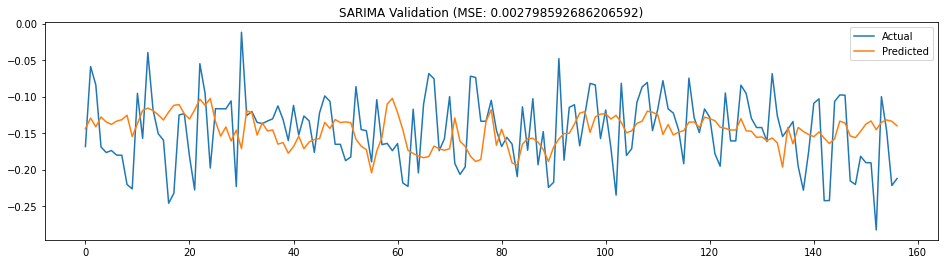

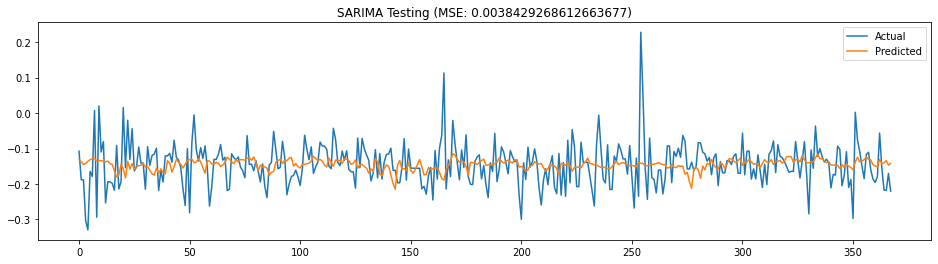

In [ ]:
plot_results(valMinmax_y,sarimaPred[:len(valMinmax_y)],'SARIMA Validation',range(len(valMinmax_y)))
plot_results(outSampleMinmax_y,sarimaPred[len(valMinmax_y):],'SARIMA Testing',range(len(outSampleMinmax_y)))









**Disadvantages of SARIMA** : **Challenges of ARIMA models**

Potential for error propagation.

Backward looking: “they are generally poor at predicting turning points (unless the turning point represents a return to a long-run equilibrium)”.

Mean-reverting: As the number of steps forecasted ahead in the future increases , the forecast converges to the mean.

But this is not a problem limited to ARIMA type models

**Potential Solution : Deep Neural Networks (DNNs)**


**Why Only Focus on Deep Neural Networks?**



**What is a Neural Network?**


In general, neural networks are composite functions which are universal function approximators.

**Every neural network is broadly composed of three types of layers:**


a. the input layer

b. the hidden layer / the computational layer

c. an output layer

Each of the 3 layers is comprised of multiple nodes and is connected to the subsequent layer through weights.



**What is a deep neural network?**

Neural Network with Multiple Hidden Layers







But Not All Neural Networks Are Suited for Time Series…



Look at linear regression as a neural network :

1) firstly,it treats the data cross sectionally. What does that mean?

2) no new features are created : does not find non-linearities in the data.



**Solution**:
** Use a deep learning network -> creates non-linearities -> but problem: still treats data cross sectionally**

Thus, a feed forward neural network cannot guage information from the spatial and sequential nature of time series data.

Thus, it is not recommended that a fully connected feed forward neural network because it is dominated by more complex deep neural networks that can infer information from time series data

**Here we consider two methods:**

A) 1 Dimensional Convolutional Neural Networks (1D-CNNs)

B) Long Short Term Memory (LSTM) Networks

What makes CNNs and LSTMs different? 

OLS and SARIMA depend on hand-selected independent variables supplied manually
They do not use these independent variables to create new independent variables or 'features'.

However, both CNNs and LSTMs can “learn an internal representation of the time series data and ideally achieve comparable performance to models fit on a version of the dataset with engineered features”.

**How?**

The input layer preserves the temporal structure of data.

The hidden layer/s use complex computational nodes: The different computational nodes used in a CNN in relation to LSTM network, result in the two type of networks processing the data differently.




In [ ]:
from numpy import array

#Split a multivariate sequence into samples that preserve the temporal structure of the data.

#SOURCE:https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # Find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [ ]:
n_steps_in =30 # Number of observations from the past that we assume to be relevant across time for forecasting.
n_steps_out = 1 # Number of units ahead that we want to forecast into the future.

#training sequence
trainSeq_x, trainSeq_y = split_sequences(trainMinmax, n_steps_in,n_steps_out)

#out of sample sequence
validationSeq_x, validationSeq_y= split_sequences(valMinmax, n_steps_in,n_steps_out)

#out of sample sequence
outSampleSeq_x, outSampleSeq_y= split_sequences(outSampleMinmax, n_steps_in,n_steps_out)

In [ ]:
trainMinmax.shape #Output: (rows,columns)

(4722, 601)

In [ ]:
trainSeq_x.shape # Output: (number of samples,size of 'window' /timesteps,number of independent variables)

(4693, 30, 600)

**Important**

The intitial weights of a neural network at assigned randomly and greatly affect how the network performs.

If you run your neural network - with the exactly same code and hyper-parameters - repeately, you will get different results.

**Solution:** Fix the random weights to the same weights every time the neural network is run.

**Convolutional Neural Network**

Convolutional neural networks (CNNs) can extract information from the temporal structure of the data by:

 a) preserving the spatial/ temporal structure of the data in the input layer
 
 b) using filters which look for patterns in spatially adjacent data

 - For instance, one filter could finding pseaks, another could find troughs while another could find a linear trend.

 - The information extracted by the filters is known as a feature map.

 - Each additional feature results in a new feature map extracting a more complex feature.

 - For a time series dataset, a filter can only move along 1 dimension - time

The CNN layer may be followed by a sub-sampling layer which reduces the noise in the learned features (i.e. the feature maps)

The sub-sampling layer is followed by a regression layer.

In [ ]:
# Implementing a neural network in Keras

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, AveragePooling1D,MaxPooling1D
from keras.layers import Conv1D,AveragePooling1D,MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD, Nadam
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1,l2,l1_l2

In [ ]:
############################# For Replicability : Always run this as one cell ##########################################
#SOURCE :
# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(12345)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.random.set_random_seed(1234)
#from keras import backend as K
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)
###########################################################################################################################

#While training the neural network, it is important that we use the MSE error of the validation set to decide when to 
#stop training our network. If we use the MSE of the training set, we will not get good predictions in the test set due 
#to over fitting. However, unlike the error in the training set, the error in the validation set does not reduce with 
#every passing epoch. Sometimes, it increases for a while before it starts declining. The patience argument in Earlystop allows us 
#to decide how many times we want the validation error to keep increasing before we stop training the neural network.

EarlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto',restore_best_weights=True)

epochs = 100000 #number of times the feed forward mechanism and back propagation are repeated 

bs = 100     #batch size for SGD :show what happens when batch size very small
lr =0        #learning rate: the degree to which the weights are updated by each batch of SGD

sgd = SGD(lr=lr) #type of optimizer - Alternative: ADAM, NADAM

X, y = split_sequences(trainMinmax, n_steps_in,n_steps_out)
n_features = X.shape[2]

np.random.seed(0)

model = Sequential() #initializing keras Sequential model

#Convolutional layer starts

model.add(Conv1D(filters=5, #number of filters
                 kernel_size=2, #size of the filte racross time
                 strides=2, #number of rows that the filter moves ahead by
                 activation='linear', #transformation
                 input_shape=(n_steps_in, n_features))) #shape of 1 sample : preserves temporal structure
                #kernel_regularizer=l2(0.009),, bias_regularizer=l2(0.01)

#Convolutional layer ends

model.add(MaxPooling1D(pool_size=1)) #sub-sampling layer - Alternative: AveragePooling1D

#model.add(BatchNormalization())

model.add(Dropout(0.1)) #reduces overfitting by dropping some weights randomly

#regression layer begins

model.add(Flatten())
model.add(Dense(1, #number of outputs
                activation='tanh', #transformation:other options include - ReLU,Linear,Sigmoid
                kernel_regularizer=l2(0.01))) 

model.compile(loss='mean_squared_error', optimizer='sgd') #specifies which optimizer and loss funtion to useto use 

#training the model

model.fit(trainSeq_x, trainSeq_y,
          batch_size=bs,
          epochs=epochs, 
          callbacks= [EarlyStop],
          verbose=2, 
          shuffle=False, #always set to false for time series data
          validation_data =(validationSeq_x, validationSeq_y))
                         
    
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 4693 samples, validate on 128 samples
Epoch 1/100000
 - 1s - loss: 0.1225 - val_loss: 0.0313
Epoch 2/100000
 - 1s - loss: 0.0532 - val_loss: 0.0297
Epoch 3/100000
 - 1s - loss: 0.0473 - val_loss: 0.0278
Epoch 4/100000
 - 1s - loss: 0.0439 - val_loss: 0.0242
Epoch 5/100000
 - 1s - loss: 0.0407 - val_loss: 0.0250
Epoch 6/100000
 - 1s - loss: 0.0388 - val_loss: 0.0222
Epoch 7/100000
 - 1s - loss: 0.0361 - val_loss: 0.0212
Epoch 8/100000
 - 1s - loss: 0.0349 - val_loss: 0.0208
Epoch 9/100000
 - 1s - loss: 0.0335 - val_loss: 0.0200
Epoch 10/100000
 - 1s - loss: 0.0328 - val_loss: 0.0192
Epoch 11/100000
 - 1s - loss: 0.0314 - val_loss: 0.0187
Epoch 12/100000
 - 1s - loss: 0.0306 - val_loss: 0.0183
Epoch 13/100000
 - 1s - loss: 0.0298 - val_loss: 0.0175
Epoch 14/100000
 - 1s - loss: 0.0290 - val_loss: 0.0171
Epoch 15/100000
 - 1s - loss: 0.0281 - val_loss: 0.0166
Epoch 16/100000
 - 1s - loss: 0.0277 - 

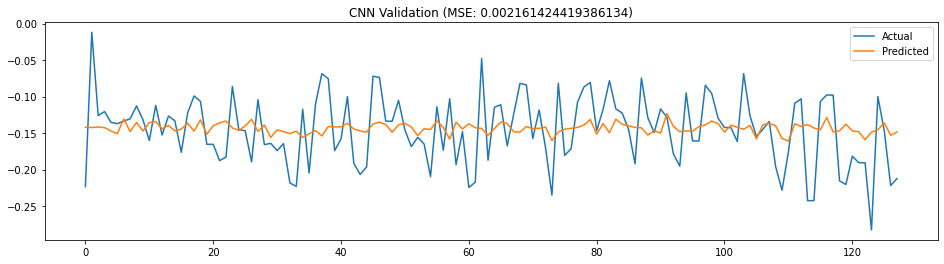

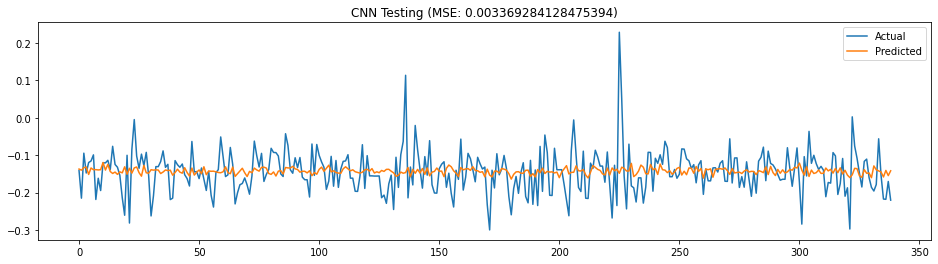

In [ ]:
# validation metrics
 
cnnValPred = model.predict(validationSeq_x)

# testing prediction

cnnOutSamplePred = model.predict(outSampleSeq_x)
    
plot_results(validationSeq_y ,cnnValPred  ,'CNN Validation',range(len(validationSeq_y)))
plot_results(outSampleSeq_y ,cnnOutSamplePred  ,'CNN Testing',range(len(outSampleSeq_y)))

**Long Short Term Memory Network (LSTM)**

A key shortcoming of CNNs for time series data is that they do not draw information from the sequential nature of independent data.

So, how does one build a neural network that can remember and extract information from a sequence? Long Short Term Memory (LSTM) Network.

LSTM networks draw information from the sequential nature of the data because they have memory i.e. it remembers what it has seen.

LSTMs belong to a larger class of neural networks known as Recurrent Neural Networks, all of which have memory.

Of many RNNs , LSTM are chosen here over a vanilla RNN as the former can learn from long sequences while the latter may not.

**How does an LSTM network build short and long term memory?**

LSTMs build short and long term memories by revealing data to the hidden nodes in a sequential fashion.

**How does sequential revealing allow an LSTM Node to Build Memory?**

Each LSTM node is comprised of LSTM cells.

The long term and short term memory is updated in each LSTM cell upon being exposed to each subsequent element of the sequence , conditional on the output of each ‘gate’.

**What is a gate?**

Each “gate” is a neural network with a sigmoid/logistic activation function which determines how the memory updated by accepting as inputs: 

a) the current elements X of the sequence

b) the outputs of the previous LSTM cell i.e. the long term memory and hidden memory from the previous member of the sequence

Each gate outputs a number between 0 (meaning no information is transferred ) and 1 (meaning all information is transferred).

In each LSTM cell, the following gates are used in the following order to build and update long term memory and short term memory:

1. The Forget Gate / Remember Vector

2. Candidate Gate

3. Input Gate / Save Vector

4. Output gate / Focus Vector 

The updated working memory at the end of the sequence is the output of an LSTM node.

This working memory or hidden memory is the new internal representation of the data that is learnt by an LSTM network i.e. the working memory is the new feature used as an input in the regression layer.

In [ ]:
#Best

from keras.layers import LSTM

################################### Set for replicability ##################################################################
np.random.seed(42)
rn.seed(12345)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)
tf.random.set_random_seed(1234)
#from keras import backend as K
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)
###########################################################################################################################


EarlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto',restore_best_weights=True)
epochs = 100000
lr =0

sgd = SGD(lr=lr) # adam = Adam(lr=lr) ;nadam = Nadam(lr=lr)
bs = 100

n_steps_in =30
n_steps_out = 1

#training sequence
trainSeq_x, trainSeq_y = split_sequences(trainMinmax, n_steps_in,n_steps_out)

#out of sample sequence
validationSeq_x, validationSeq_y= split_sequences(valMinmax, n_steps_in,n_steps_out)

#out of sample sequence
outSampleSeq_x, outSampleSeq_y= split_sequences(outSampleMinmax, n_steps_in,n_steps_out)

X_useless, y_useless = split_sequences(trainMinmax, n_steps_in,n_steps_out)
n_features = X_useless.shape[2]

np.random.seed(0); print(np.random.rand(4))

model = Sequential()
model.add(LSTM(300, # number of LSTM nodes
               input_shape=(n_steps_in, n_features),
               activation = 'tanh')) # transformation:best to not use any other type of transformation
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'linear'))
model.compile(loss='mean_squared_error', optimizer='sgd')

#model
model.fit(trainSeq_x, trainSeq_y,batch_size=bs,epochs=epochs, callbacks= [EarlyStop] ,verbose=2, shuffle=False,
                         validation_data =(validationSeq_x, validationSeq_y))

[0.5488135  0.71518937 0.60276338 0.54488318]
Train on 4693 samples, validate on 128 samples
Epoch 1/100000
 - 22s - loss: 0.3244 - val_loss: 0.0025
Epoch 2/100000
 - 22s - loss: 0.0280 - val_loss: 0.0027
Epoch 3/100000
 - 22s - loss: 0.0254 - val_loss: 0.0027
Epoch 4/100000
 - 22s - loss: 0.0240 - val_loss: 0.0028
Epoch 5/100000
 - 22s - loss: 0.0235 - val_loss: 0.0027
Epoch 6/100000
 - 22s - loss: 0.0225 - val_loss: 0.0025
Epoch 7/100000
 - 22s - loss: 0.0223 - val_loss: 0.0026
Epoch 8/100000
 - 22s - loss: 0.0214 - val_loss: 0.0030
Epoch 9/100000
 - 22s - loss: 0.0203 - val_loss: 0.0026
Epoch 10/100000
 - 22s - loss: 0.0199 - val_loss: 0.0027
Epoch 11/100000
 - 22s - loss: 0.0192 - val_loss: 0.0024
Epoch 12/100000
 - 22s - loss: 0.0180 - val_loss: 0.0028
Epoch 13/100000
 - 22s - loss: 0.0182 - val_loss: 0.0024
Epoch 14/100000
 - 22s - loss: 0.0169 - val_loss: 0.0026
Epoch 15/100000
 - 22s - loss: 0.0169 - val_loss: 0.0024
Epoch 16/100000
 - 22s - loss: 0.0167 - val_loss: 0.0029
Epoc

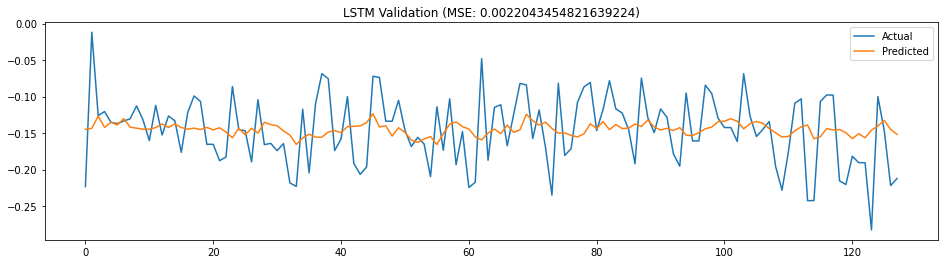

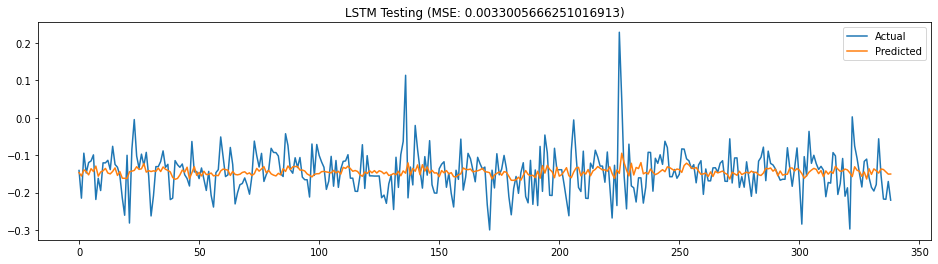

In [ ]:
# validation metrics 
lstmValPred = model.predict(validationSeq_x)

# out of sample metrics
lstmOutSamplePred = model.predict(outSampleSeq_x)

plot_results(validationSeq_y ,lstmValPred  ,'LSTM Validation',range(len(validationSeq_y )))
plot_results(outSampleSeq_y ,lstmOutSamplePred  ,'LSTM Testing',range(len(outSampleSeq_y)))